# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/ddtbc/Desktop/作業/ML100day/data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [10]:
app_train['LIVINGAREA_AVG'][app_train['LIVINGAREA_AVG'].isnull()==False].describe()

count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64

In [24]:
app_train['LIVINGAREA_AVG'][app_train['LIVINGAREA_AVG'].isnull()==True]

2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
          ..
307497   NaN
307499   NaN
307502   NaN
307503   NaN
307504   NaN
Name: LIVINGAREA_AVG, Length: 154350, dtype: float64

In [37]:
nonliving = app_train['NONLIVINGAREA_AVG'][app_train['LIVINGAREA_AVG'].isnull()==True]
nonliving = nonliving[nonliving.isnull()==False]

In [51]:
for i in list(nonliving.index):
    app_train['LIVINGAREA_AVG'][i] = 1-app_train['NONLIVINGAREA_AVG'][i]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


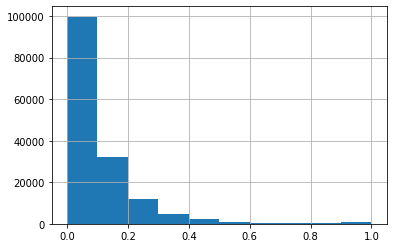

In [53]:
app_train['LIVINGAREA_AVG'].hist()

In [65]:
Living_df = pd.concat([app_train['TARGET'],app_train['LIVINGAREA_AVG']],axis=1)
Living_df = Living_df[Living_df['LIVINGAREA_AVG'].isnull()==False]

In [66]:
Living_df['LIVINGAREA_AVG_BIN'] = pd.qcut(Living_df['LIVINGAREA_AVG'],10)

In [69]:
Living_df

,TARGET,LIVINGAREA_AVG,LIVINGAREA_AVG_BIN
0,1,0.0190,"(0.0144, 0.0358]"
1,0,0.0549,"(0.0516, 0.0633]"
12,0,0.0778,"(0.0748, 0.0895]"
13,0,0.1397,"(0.114, 0.155]"
14,0,0.3774,"(0.236, 1.0]"
...,...,...,...
307506,0,0.1965,"(0.155, 0.236]"
307507,0,0.0257,"(0.0144, 0.0358]"
307508,0,0.9279,"(0.236, 1.0]"
307509,1,0.0061,"(-0.001, 0.0144]"


In [70]:
Living_df=Living_df.groupby('LIVINGAREA_AVG_BIN').mean()
Living_df['LIVINGAREA_AVG_BIN'] = Living_df.index

In [76]:
Living_df['LIVINGAREA_AVG_BIN'] = Living_df.index

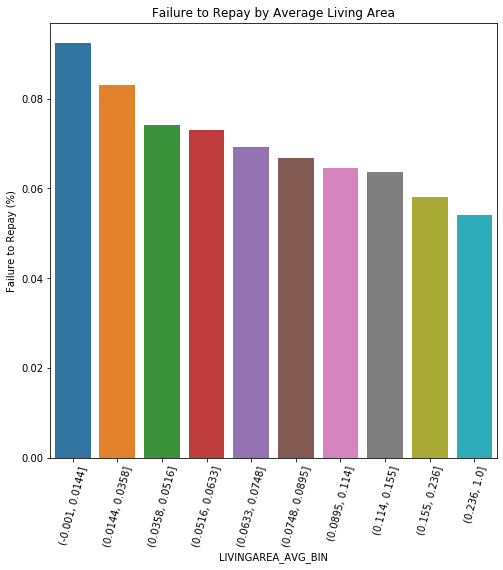

In [78]:
plt.figure(figsize =(8,8))

px = Living_df['LIVINGAREA_AVG_BIN']
py = Living_df['TARGET']

sns.barplot(px,py)

plt.xticks(rotation = 75); plt.xlabel('LIVINGAREA_AVG_BIN'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Average Living Area');